In [3]:
# imdb 데이터셋 로드하기

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
# 정수 시퀀스를 이진 행렬로 인코딩하기 (훈련데이터 25000개, 빈도 많은 단어 10000개)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 크기가 (len(sequences),dimension)이고 모든 원소가 0으로 채워진 2차원 행렬 만들어줌
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만듬
    return results

# x: 리뷰의 목록, 각 리뷰는 단어 인덱스의 리스트

x_train = vectorize_sequences(train_data) # 각 데이터들을 벡터로 변환
x_test = vectorize_sequences(test_data)

# y: 부정을 나타내는 0과 긍정을 나타내는 1의 리스트

y_train = np.asarray(train_labels).astype('float32') # np.array와 비슷하게 행렬을 만들어주지만 참조본이 아니라 복사본을 만들어줌
y_test = np.asarray(test_labels).astype('float32')

NameError: name 'train_data' is not defined

In [1]:
# enumerate 연습 - 리스트 안의 원소들에 대해 인덱스 번호와 원소를 순서대로 반환해줌

fruits = ['strawberry', 'banana', 'melon', 'grape', 'peach']

dimension = 4
results = np.zeros((len(fruits),dimension))
print(results)

for index, value in enumerate(fruits):
    print(index, value)
    
for i, v in enumerate(nums):
    print(i,v)

NameError: name 'np' is not defined

In [23]:
from keras import models
from keras import layers

In [24]:
# 모델 정의하기

model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 모델 컴파일 하기

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 검증, 테스트 세트 준비하기

x_val = x_train[:10000]
x_test = x_train[10000:]

y_val = y_train[:10000]
y_test = y_train[10000:]

# 모델 훈련하기 (epoch: 학습 반복 횟수, batch_size: 몇 개의 샘플로 가중치를 갱신할 것인가?)

history = model.fit(x_test, y_test, epochs=20, batch_size=512, validation_data=(x_val,y_val))

# 최종 결과 (정확도) 보기

results = model.evaluate(x_test, y_test)
print(results)

# 테스트 데이터에 대해서 예측하기

print(model.predict(x_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 277us/step - loss: 0.4885 - accuracy: 0.8020 - val_loss: 0.3725 - val_accuracy: 0.8648
Epoch 2/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.2844 - accuracy: 0.9073 - val_loss: 0.3093 - val_accuracy: 0.8753
Epoch 3/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.1985 - accuracy: 0.9369 - val_loss: 0.2698 - val_accuracy: 0.8915
Epoch 4/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.1525 - accuracy: 0.9507 - val_loss: 0.2775 - val_accuracy: 0.8907
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1152 - accuracy: 0.9629 - val_loss: 0.3012 - val_accuracy: 0.8838
Epoch 6/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.0906 - accuracy: 0.9714 - val_loss: 0.3349 - val_accuracy: 0.8816
Epoch 7/20
15000/15000 [==============================] - 3s 2

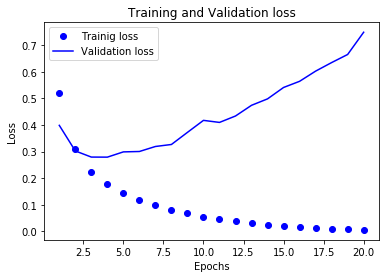

In [17]:
# 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Trainig loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
# 훈련하는 동안 발생한 모든 정보를 갖고 있는 딕셔너리인 history 속성의 key들을 확인

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

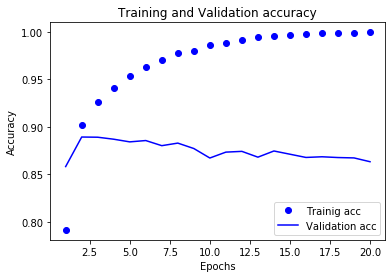

In [22]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs,acc,'bo',label='Trainig acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()